# Quick Start

For a very brief introduction to `Pyatoa`'s misfit quantification capabilities, let's generate the waveform image shown on the front page. The code snippet below collects, formats and measures observed and synthetic waveform data using default values. Comments throughout the code black explain what each statement is doing. The end result is a waveform and map figure that presents necessary information to assess waveform misfit.

[2022-03-01 10:48:53] - pyatoa - DEBUG: Component list set to E/N/Z
[2022-03-01 10:48:53] - pyatoa - INFO: gathering data for NZ.BFZ.*.*
[2022-03-01 10:48:53] - pyatoa - INFO: gathering observed waveforms
[2022-03-01 10:48:53] - pyatoa - INFO: searching local filesystem for observations
[2022-03-01 10:48:53] - pyatoa - DEBUG: searching for observations: ../tests/test_data/test_mseeds/2018/NZ/BFZ/*/NZ.BFZ.*.*.2018.049
[2022-03-01 10:48:53] - pyatoa - INFO: retrieved observations locally:
../tests/test_data/test_mseeds/2018/NZ/BFZ/HHE/NZ.BFZ.10.HHE.D.2018.049
[2022-03-01 10:48:53] - pyatoa - INFO: retrieved observations locally:
../tests/test_data/test_mseeds/2018/NZ/BFZ/HHN/NZ.BFZ.10.HHN.D.2018.049
[2022-03-01 10:48:53] - pyatoa - INFO: retrieved observations locally:
../tests/test_data/test_mseeds/2018/NZ/BFZ/HHZ/NZ.BFZ.10.HHZ.D.2018.049
[2022-03-01 10:48:53] - pyatoa - INFO: matching observed waveforms found
[2022-03-01 10:48:53] - pyatoa - INFO: gathering StationXML
[2022-03-01 10:48

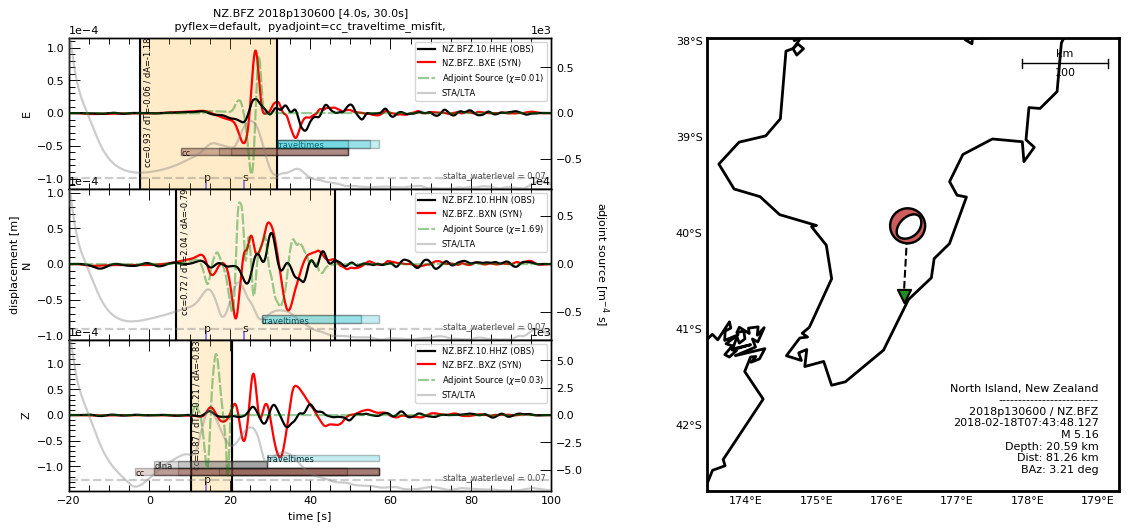

In [1]:
import os
from obspy import read_events
from pyatoa import Config, Manager, logger

# Ensure that we get the maximum level of under-the-hood log output
logger.setLevel("DEBUG")

# All the data we need is stored within the following directory
test_data = "../tests/test_data"

# We need an ObsPy Event object to define where and when our event is
event = read_events(os.path.join(test_data, "test_catalog_2018p130600.xml"))[0]

# The Config object controls how the User interfaces with Pyatoa
cfg = Config(event_id="2018p130600",
             min_period=4,   # minimum filter bandpass in seconds
             max_period=30,  # maximum filter bandpass in seconds
             end_pad=100,    # desired time-series end point w.r.t event origin time
             client=None,    # This parameter ensures that Pyatoa does not search FDSN for data
             paths={         # Paths where data and metadata is stored in a specific format
                 "waveforms": os.path.join(test_data, "test_mseeds"),
                 "responses": os.path.join(test_data, "test_seed"),
                 "synthetics": os.path.join(test_data, "synthetics"),
                    },

             )

# The Manager object is the main object in Pyatoa, it stores waveform and metadata and processes accordingly
# Each Manager is linked to a single event, but can loop through individual stations for mass processing
mgmt = Manager(config=cfg, event=event)

# The Manager.gather() function performs a series of generalized searches for corresponding data
mgmt.gather(code="NZ.BFZ.*.*")

# the Manager.flow() function standardizes and preprocesses waveforms, then windows them and generates adjoint sources
mgmt.flow()

# The Manager can plot maps and waveform figures individually, or together
mgmt.plot(choice="both", show=True)